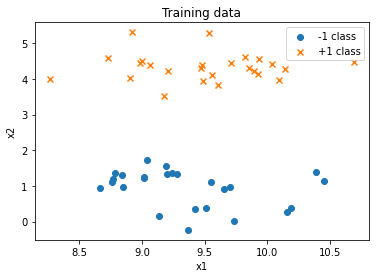

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Training data")
plt.show()

In [11]:
import numpy as np
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [6]:
model.n_support_

array([1, 1], dtype=int32)

In [7]:
model.support_

array([42,  1], dtype=int32)

In [8]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [9]:
y[model.support_]

array([-1,  1])

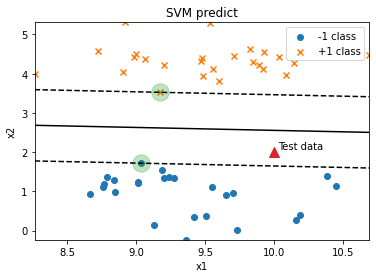

In [13]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM predict")

plt.show()

In [14]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [15]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [16]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [17]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])